In [1]:
import pandas as pd
demographics = pd.read_csv("../data/raw/kaggle/demographics.csv")
show_info = pd.read_csv("../data/raw/kaggle/show info.csv")

# Demographics

In [8]:
demographics.shape

(353, 9)

In [3]:
demographics.head()

,ID,show_title,confirmation_date,character_name,race,gender,orientation,role,representation
0,tt7736544,3Below: Tales of Arcadia,7/12/2019,Shannon Longhannon,White,Cis Woman,Lesbian,Recurring Character,Explicit
1,tt1305826,Adventure Time,5/17/2010,Princess Bubblegum,NaN,Cis Woman,Undetermined,Recurring Character,Explicit
2,tt1305826,Adventure Time,4/5/2010,Marceline the Vampire Queen,NaN,Cis Woman,Undetermined,Recurring Character,Explicit
3,tt1305826,Adventure Time,4/26/2010,BMO,NaN,Agender,Undetermined,Recurring Character,Explicit
4,tt11165358,Adventure Time: Distant Lands,6/25/2020,Y5,NaN,Cis Woman,Ambiguous,Recurring Character,Implicit


As seen above, we have the data of LGBTQIA+ characters across a variety of animated shows. The data provided details their sexual orientation, gender, ethnic origin, role, type of representation (explicit or implicit) and show title. In total, there are 353 reported queer characters.

## Representation by Show

The top 10 shows with most queer characters are:

In [162]:
# divided the original dataframe to get only the top 10 characters, with a corresponding explicit and implicit column
show_rep = demographics.groupby(["show_title", "representation"]).size().unstack()
show_rep["total"] = show_rep["Explicit"].fillna(0) + show_rep["Implicit"].fillna(0)
top_ten = show_rep.nlargest(10, "total").head(10)
top_ten

representation,Explicit,Implicit,total
show_title,,,
She-Ra and the Princesses of Power,13.0,6.0,19.0
South Park,9.0,2.0,11.0
Steven Universe,8.0,3.0,11.0
Craig of the Creek,5.0,4.0,9.0
OK K.O.! Let's Be Heroes,7.0,2.0,9.0
Big Mouth,8.0,NaN,8.0
Q-Force,7.0,1.0,8.0
BoJack Horseman,7.0,NaN,7.0
Family Guy,4.0,3.0,7.0


Plotting the data shows that only a small portion of the reported LGBTQIA+ characters are actually explicit representations:

<Axes: ylabel='queer characters'>

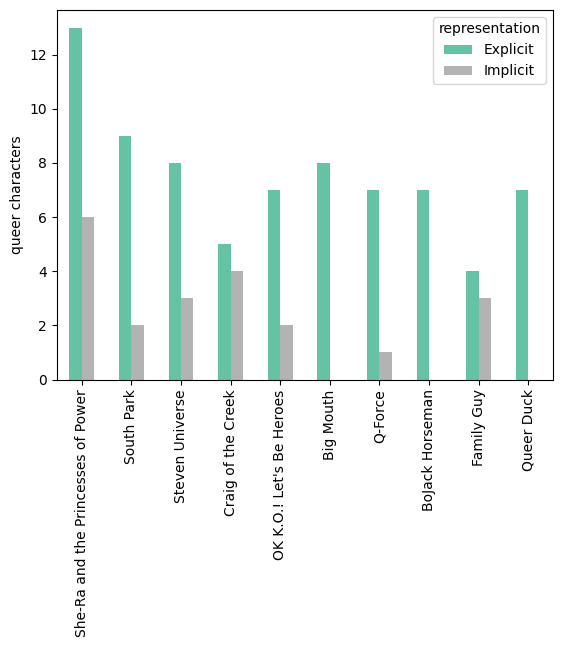

In [166]:
top_ten.drop(["total"], axis=1).plot(kind="bar", cmap="Set2", xlabel="", ylabel="queer characters")

When grouping the shows by most explicit queer characters, we obtain the following rankings:

<Axes: ylabel='queer characters'>

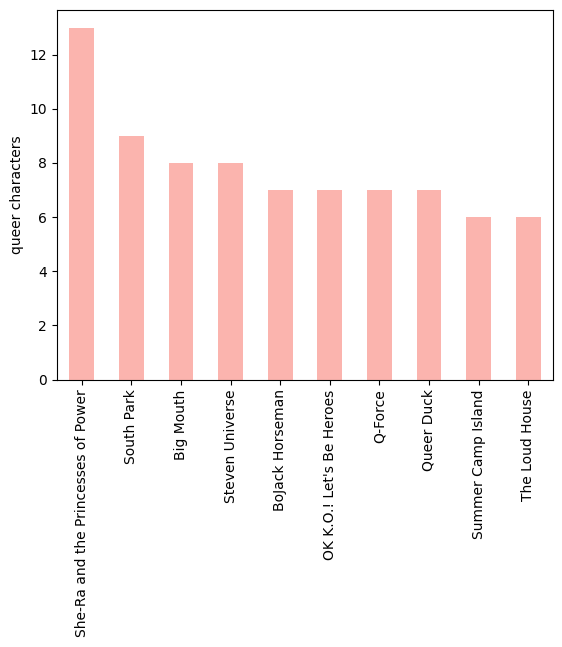

In [167]:
show_rep.nlargest(10, "Explicit").drop(["total", "Implicit"], axis=1).plot(kind="bar", cmap="Pastel1", xlabel="", ylabel="queer characters", legend="")

While She-Ra and South Park remain in the first two positions, Steven Universe descends one place, BoJack Horseman and Big Mouth ascend a couple of places, and Summer Camp Island as well as The Loud House make their way into the graph. 

In [168]:
show_rep.mean()

representation
Explicit    2.778947
Implicit    1.780000
total       2.991525
dtype: float64

In [169]:
show_rep.median()

representation
Explicit    2.0
Implicit    1.0
total       2.0
dtype: float64

It is also worth noting that the top ten shows with explicit queer representations exceed the median of the total and explicit characters by 3 times, while it surpasses the implicit representation median by 6 times. 

(Due to the extreme differences in the data, the median is a more representative measure of central tendency).

## Type of Representation

In [10]:
demographics["representation"].value_counts()

representation
Explicit    264
Implicit     89
Name: count, dtype: int64

Amongst the 353 characters, 264 of them are explicit queer representations, while 89 of them are implicit.

<Axes: title={'center': 'Type of Representation by Year'}, xlabel='year', ylabel='queer characters'>

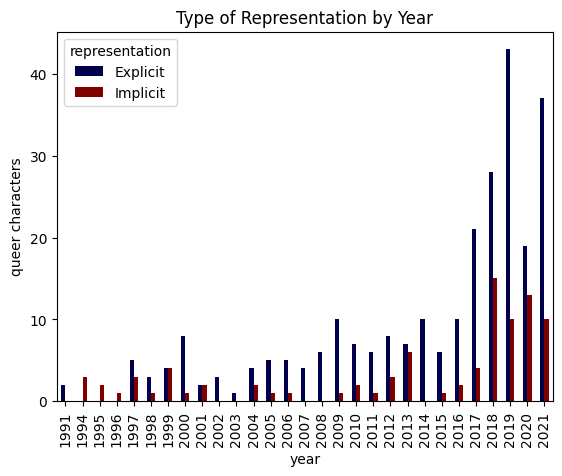

In [56]:
# creating a year column
demographics['confirmation_date'] = pd.to_datetime(demographics['confirmation_date'])
demographics["year"] = demographics["confirmation_date"].dt.year

# analyzing the type of representation by year 
demographics.groupby(["year", "representation"]).size().unstack().plot(kind="bar", title="Type of Representation by Year", ylabel="queer characters", cmap="seismic")

As the years go by, not only the LGBTQIA+ representation grows, but the representation also starts getting more explicit. While it started mainly with implicit queer characters, explicit representation begins growing steadily by the 2000s.

However, as the representation goes up, so does the implicit LGBTQIA+ characters. Though they were declining before the 2010s, starting from 2013 and 2015 the implicit representation begins heightening again; which is an undesirable outcome considering it censors and obscures diversity.

# Show Info